In [3]:
from matplotlib import pyplot as pl
import numpy as np

%matplotlib inline

In [4]:
pl.rc('font', family='serif', size=16)

In [5]:
# set parameter
L = 1.0
nx = 51
dx = L/ (nx - 1)
x = np.linspace(0.0, L, num = nx)

alpha = 1.22e-3
q = 0.0

# set initial condition
T0 = np.zeros(nx)
T0[0] = 100.0

In [6]:
def btcs(u0, nt, dt, dx, alpha, q = 0.0):
    u = u0.copy()
    sigma = alpha * dt / dx**2
    A = lhs_operator(u0.size-2 ,sigma)
    for n in range(nt):
        b = rhs_vector(u, sigma, q * dx)
        u[1:-1] = np.linalg.solve(A, b)
        # update boundary value
        u[0] = u0[0]
        u[-1] = u[-2] + q*dx
    
    return u

In [12]:
def lhs_operator(N, sigma):
    #diagonal coefficients
    D = np.diag((2 + 1 / sigma) * np.ones(N))
    D[-1,-1] = 1 + 1 / sigma
    #upper diagonal
    U = np.diag(-1.0 * np.ones(N-1), k=1)
    #lower diagonal
    L = np.diag(-1.0 * np.ones(N-1), k=-1)
    #assumble
    A = D + U + L
    print(A)
    return A

In [13]:
def rhs_vector(T, sigma, qdx):
    b = T[1:-1] / sigma
    #dirichlet
    b[0] += T[0]
    #neumann 
    b[-1] += qdx
    return b

[[ 2.2 -1.   0.  ...  0.   0.   0. ]
 [-1.   2.2 -1.  ...  0.   0.   0. ]
 [ 0.  -1.   2.2 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  2.2 -1.   0. ]
 [ 0.   0.   0.  ... -1.   2.2 -1. ]
 [ 0.   0.   0.  ...  0.  -1.   1.2]]


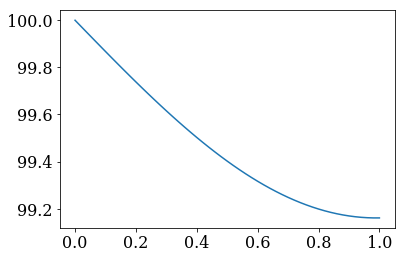

In [14]:
nt =1000
sigma = 5.0
dt = sigma * dx**2 /alpha

T = btcs(T0, nt, dt, dx, alpha, q = 0.0)
pl.plot(x,T)